In [1]:
import ModelViz

Create an instance of the ModelViz class, then use the functions to 
* `load_data / load_mfdata` to load data
* `load_grid` to load grid information
* `summarise_features` to sum sets of variables together
* `preprocess` to strip boundary and normalise 
* `make_tsds` to reshape data into a time series data set (tsds)
* `load_tsds` to load an existing time series data set from csv
* `train` to create a clustering model
* `load_model` to load an existing model
* `predict` to create predictions based on a tsds and model
* `get_cluster_info` to summarise predictions and calcuate mean/std dev for each cluster
* `plot_map` to plot the cluster output as a map
* `plot_ts` to plot time series for each cluster


## Train the model

Create an instace of ModelViz for the training data, read in that data and grid info

In [2]:
train = ModelViz.ModelViz()
train.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[0-4]*.nc')
train.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

In [3]:
# Add physics fields from separate files
import xarray as xr
phys = ModelViz.ModelViz()
phys.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_TS_200[0-4]*.nc')
phys.ds = phys.ds.rename_dims({'y_grid_T':'y','x_grid_T':'x'}).rename({'nav_lat_grid_T':'nav_lat','nav_lon_grid_T':'nav_lon'})
train.ds = xr.merge([train.ds,phys.ds[['votemper','vosaline']]])

Combine variables and preprocess - stripping the boundary layers and normalising

In [4]:
sum_vars={'Phytoplankton': ['P1_c', 'P2_c', 'P3_c', 'P4_c'],
            'Zooplankton': ['Z4_c', 'Z5_c', 'Z6_c'],
            'DOM': ['R1_c', 'R2_c', 'R3_c'],
            'POM': ['R4_c', 'R6_c', 'R8_c']}
train.summarise_features(sum_vars)
train.cluster_vars = ['votemper','vosaline','N1_p', 'N3_n', 'N4_n', 'N5_s', 'O2_o', 'B1_c','O3_c', 'O3_TA', 'Phytoplankton', 'Zooplankton', 'DOM', 'POM']
train.preprocess()

Make the dataset by reshaping the data into the form needed 

In [5]:
train.make_tsds()

Fit the model (can take some time) and save

In [6]:
train.train(n_clusters=6, method='quantile', save=True, file_path='model.ks')

Initialising using quantiles
0.251 --> 0.243 --> 0.241 --> 0.239 --> 0.238 --> 0.237 --> 0.235 --> 0.234 --> 0.234 --> 0.233 --> 0.233 --> 0.232 --> 0.232 --> 0.231 --> 0.230 --> 0.230 --> 0.229 --> 0.229 --> 0.228 --> 0.228 --> 0.228 --> 0.227 --> 0.227 --> 0.226 --> 0.226 --> 0.225 --> 0.225 --> 0.224 --> 0.224 --> 0.223 --> 0.223 --> 0.223 --> 0.222 --> 0.222 --> 0.222 --> 0.221 --> 0.221 --> 0.220 --> 0.220 --> 0.219 --> 0.219 --> 0.218 --> 0.218 --> 0.218 --> 0.218 --> 0.218 --> 0.217 --> 0.217 --> 0.217 --> 0.216 --> 0.216 --> 0.215 --> 0.215 --> 0.214 --> 0.214 --> 0.214 --> 0.214 --> 0.213 --> 0.213 --> 0.213 --> 0.212 --> 0.212 --> 0.211 --> 0.211 --> 0.210 --> 0.210 --> 0.210 --> 0.209 --> 0.209 --> 0.209 --> 0.208 --> 0.208 --> 0.207 --> 0.207 --> 0.207 --> 0.206 --> 0.206 --> 0.205 --> 0.205 --> 0.205 --> 0.204 --> 0.204 --> 0.204 --> 0.203 --> 0.203 --> 0.203 --> 0.202 --> 0.202 --> 0.202 --> 0.201 --> 0.201 --> 0.201 --> 0.200 --> 0.200 --> 0.200 --> 0.200 --> 0.199 --> 0

Produce a prediction of the training data

In [7]:
train.predict()

/users/modellers-new/dapa/mambaforge/envs/modelviz/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 61849 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Create cluster dataset with the classification map, plus mean and std dev time series for each cluster

In [8]:
train.get_cluster_info(save=True, file_path='trained_clusters.nc')

Processing votemper


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.60it/s]


Processing vosaline


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.73it/s]


Processing N1_p


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.74it/s]


Processing N3_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.85it/s]


Processing N4_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.73it/s]


Processing N5_s


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.38it/s]


Processing O2_o


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.73it/s]


Processing B1_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.76it/s]


Processing O3_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.48it/s]


Processing O3_TA


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.67it/s]


Processing Phytoplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.83it/s]


Processing Zooplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.31it/s]


Processing DOM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.22it/s]


Processing POM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.30it/s]


Plot data

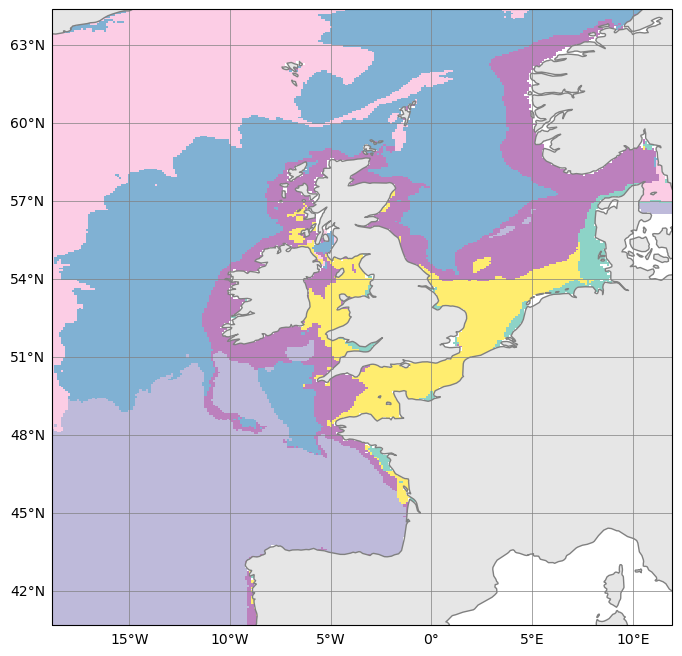

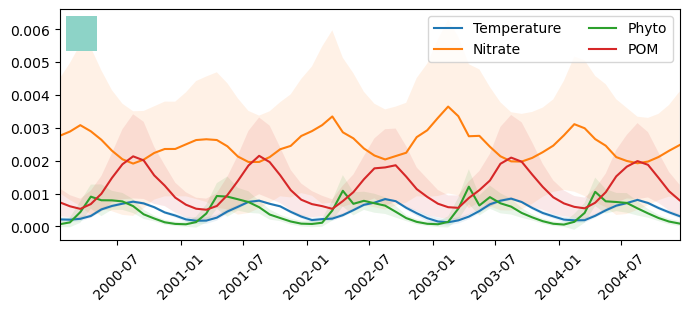

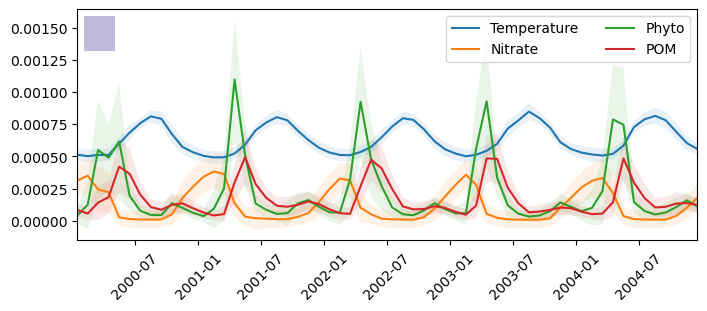

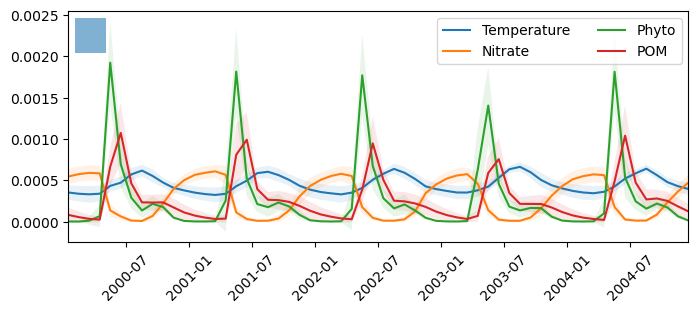

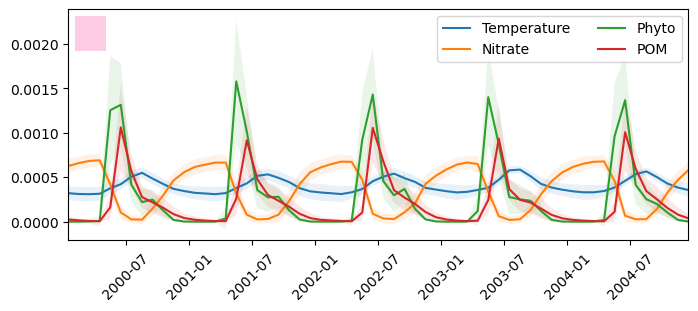

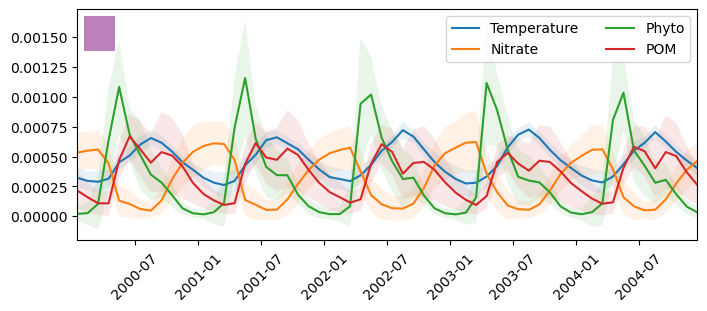

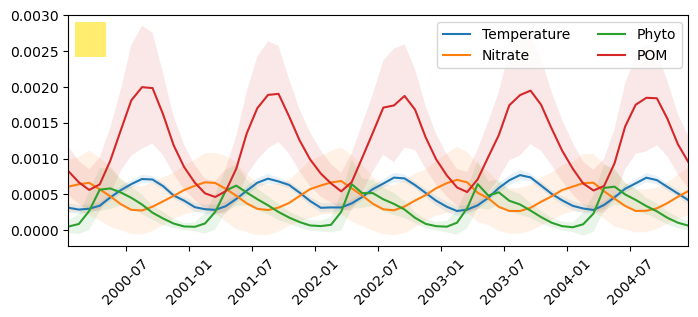

In [9]:
train.plot_map(savefig=True, file_path='class_map.png')
train.plot_ts(plot_vars={'votemper':'Temperature','N3_n':'Nitrate','Phytoplankton':'Phyto', 'POM':'POM'})

## Form prediction using new data

Make a new instance, load our model, and dataset and grid infomation.

In [10]:
predict = ModelViz.ModelViz()

In [11]:
predict.load_model('model.ks')

In [12]:
predict.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[5-9]*.nc')
predict.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

In [13]:
phys = ModelViz.ModelViz()
phys.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_TS_200[5-9]*.nc')
phys.ds = phys.ds.rename_dims({'y_grid_T':'y','x_grid_T':'x'}).rename({'nav_lat_grid_T':'nav_lat','nav_lon_grid_T':'nav_lon'})
predict.ds = xr.merge([predict.ds,phys.ds[['votemper','vosaline']]])

Summarise and preprocess data

In [14]:
predict.summarise_features(sum_vars)
predict.cluster_vars = ['votemper','vosaline','N1_p', 'N3_n', 'N4_n', 'N5_s', 'O2_o', 'B1_c','O3_c', 'O3_TA', 'Phytoplankton', 'Zooplankton', 'DOM', 'POM']
predict.preprocess()

Create the tsds, produce the prediction and create cluster dataset

In [15]:
predict.make_tsds()
predict.predict()
predict.n_clusters = 6
predict.get_cluster_info(save=True, file_path='predicted_clusters.nc')

/users/modellers-new/dapa/mambaforge/envs/modelviz/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 61849 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Processing votemper


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.64it/s]


Processing vosaline


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.65it/s]


Processing N1_p


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.71it/s]


Processing N3_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.14it/s]


Processing N4_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.76it/s]


Processing N5_s


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]


Processing O2_o


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]


Processing B1_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.69it/s]


Processing O3_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.66it/s]


Processing O3_TA


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.67it/s]


Processing Phytoplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.79it/s]


Processing Zooplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.27it/s]


Processing DOM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.17it/s]


Processing POM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.27it/s]


Plot output

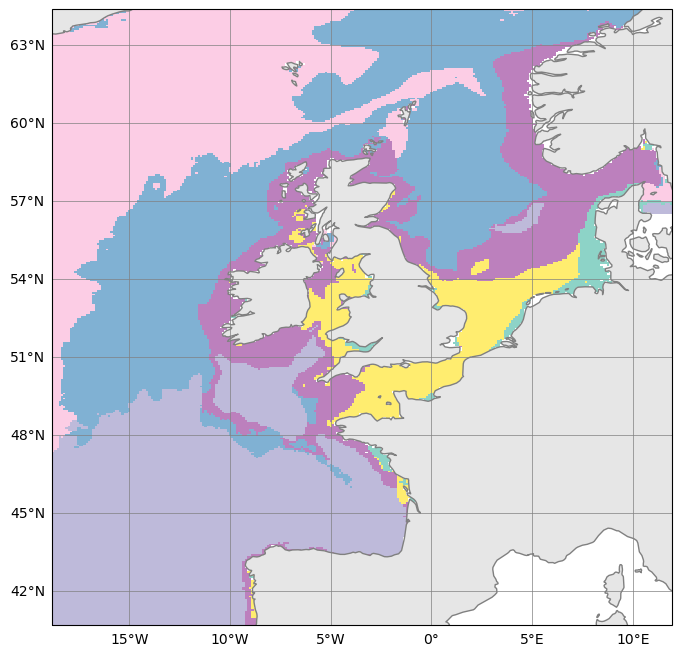

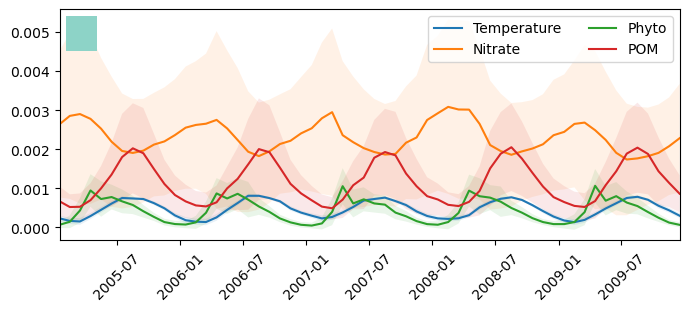

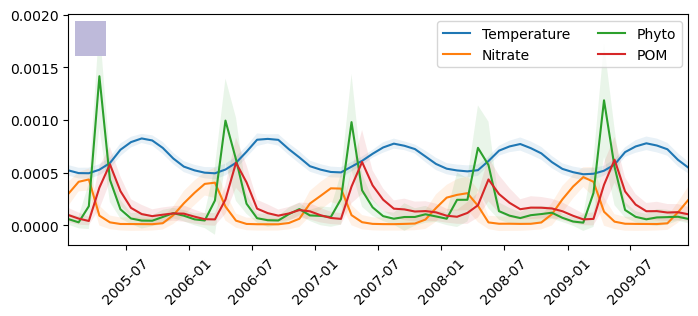

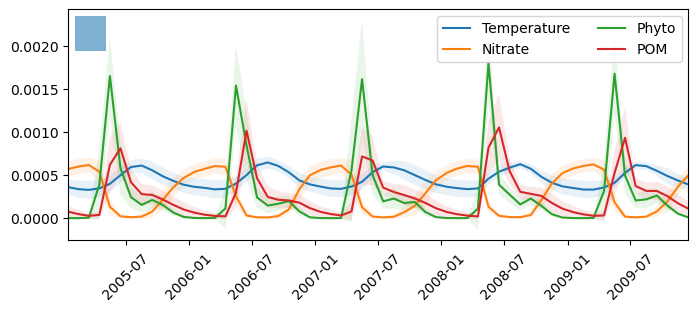

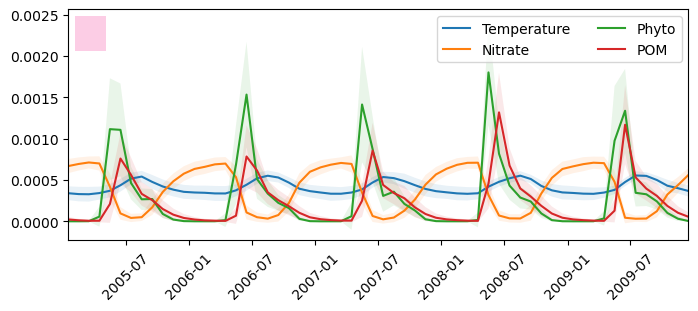

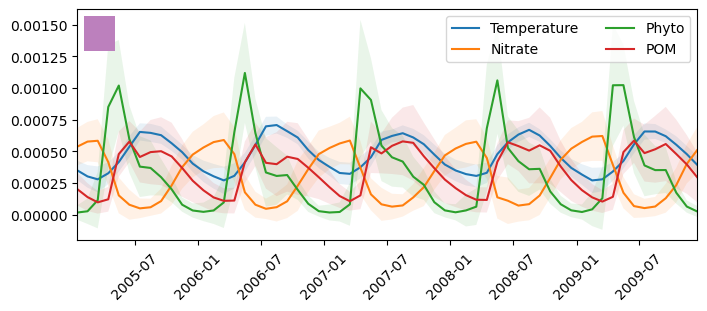

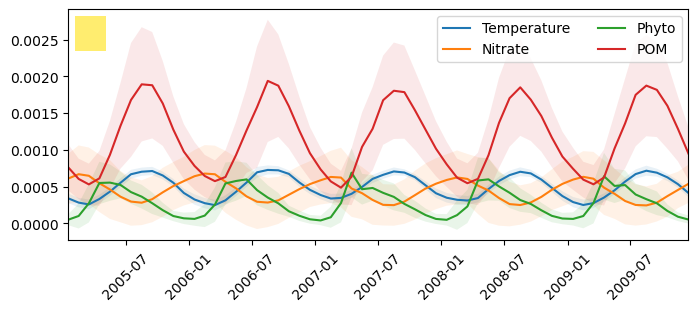

In [16]:
predict.plot_map()
predict.plot_ts(plot_vars={'votemper':'Temperature','N3_n':'Nitrate','Phytoplankton':'Phyto', 'POM':'POM'})

Plot time series with rescaled values

In [17]:
predict.cluster_ds = predict.cluster_ds.groupby('time.month').mean().rename({'month':'time'})

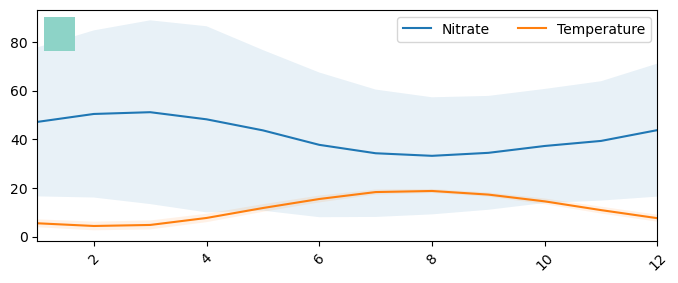

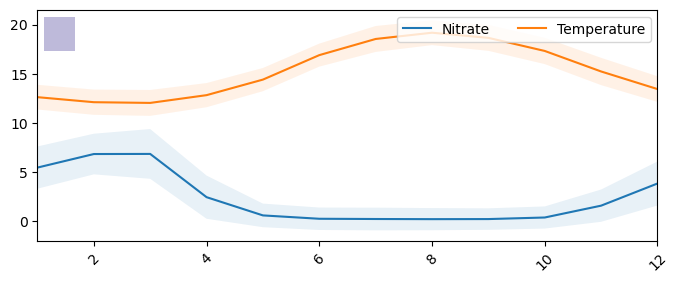

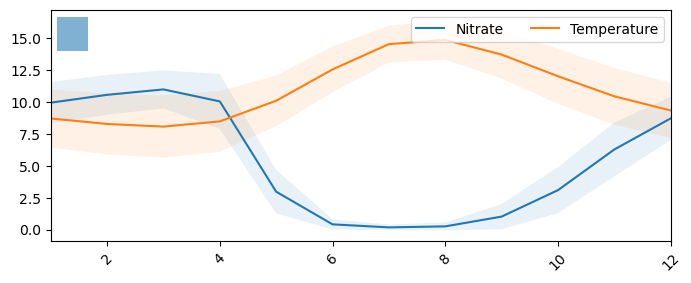

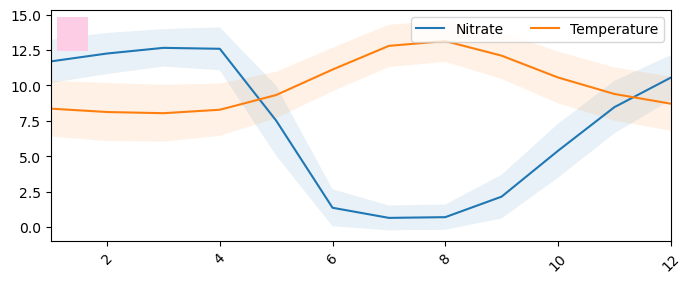

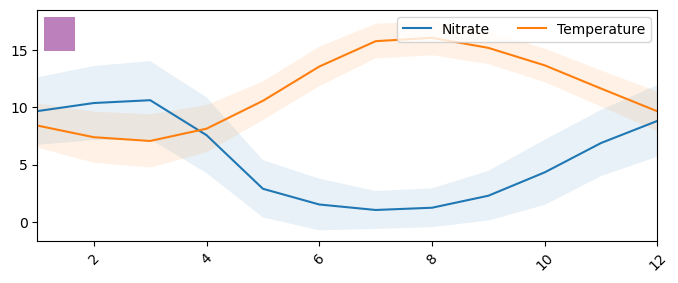

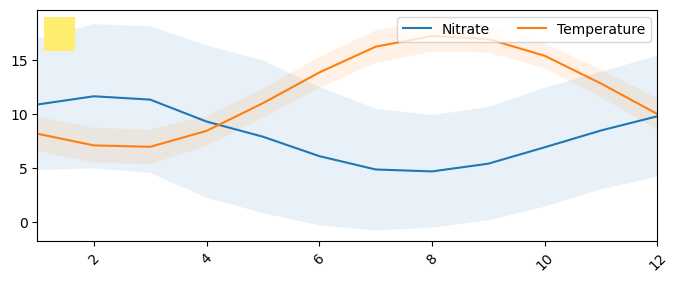

In [18]:
plot_vars = {'N3_n':'Nitrate','votemper':'Temperature'}
predict.plot_ts(plot_vars=plot_vars,rescale=True)